## MODUL 2

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

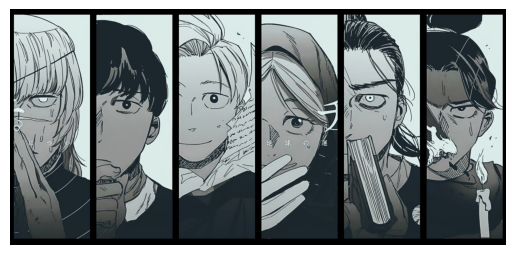

In [60]:
img = cv2.imread('Assets/aktivis.jpg')
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()


In [16]:
tinggi, lebar = img.shape

pecah_gambar = lebar // 6

bagian = []
for i in range(6):
    kiri = i * pecah_gambar
    kanan = (i + 1) * pecah_gambar
    bagan = img[:, kiri:kanan]
    bagian.append(bagan)

In [17]:
urutan_baru = [1, 5, 3, 0, 4, 2]
pengurutan_bagan = [bagian[i] for i in urutan_baru]

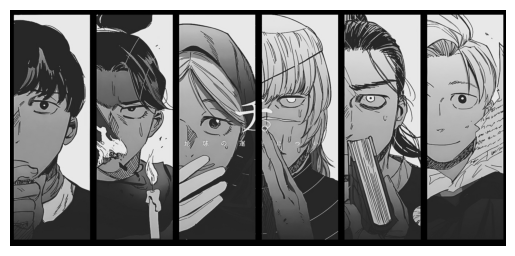

True

In [46]:
img_urutan_baru = np.hstack(pengurutan_bagan)

img_baru_rgb = cv2.cvtColor(img_urutan_baru, cv2.COLOR_BGR2RGB)
plt.imshow(img_baru_rgb, cmap='gray')
plt.axis('off')
plt.show()

# Simpan hasil
cv2.imwrite('hasil_reorder.jpg', img_urutan_baru)


(np.float64(-0.5), np.float64(2717.5), np.float64(1293.5), np.float64(-0.5))

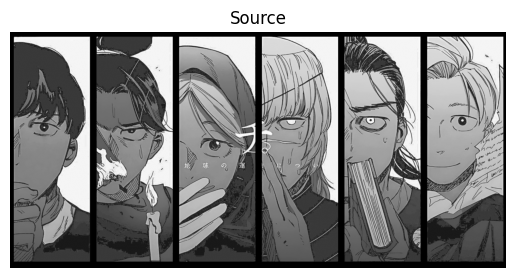

In [47]:
def hitung_cdf(gambar):
    hist = np.zeros(256)
    for pixel in img_urutan_baru.ravel():
        hist[pixel] += 1
    cdf = hist.cumsum()
    return cdf / cdf[-1]

def ekualisasi(gambar):
    cdf = hitung_cdf(img_urutan_baru)
    mapping = (cdf * 255).astype(np.uint8)
    hasil = mapping[img_urutan_baru]
    return hasil

gambar_ekualisasi = cv2.imread('Assets/hasil_reorder.jpg', cv2.IMREAD_GRAYSCALE)

diekualisasi_1 = ekualisasi(gambar_ekualisasi)

plt.title("Source")
plt.imshow(diekualisasi_1, cmap='gray')
plt.axis('off')

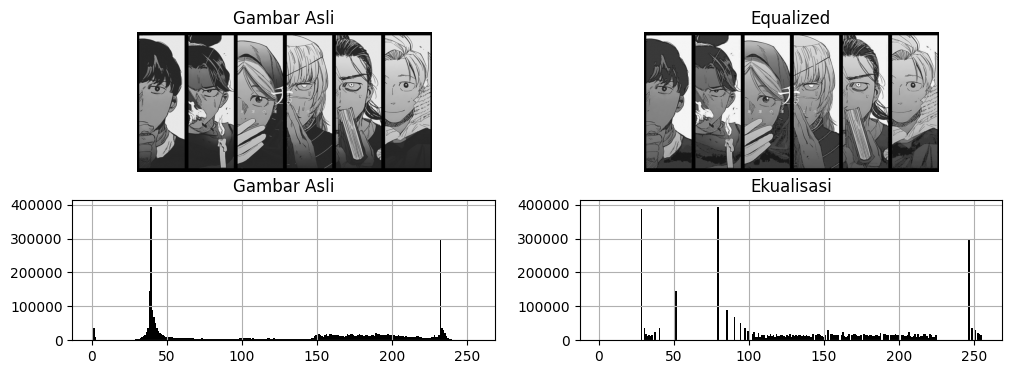

In [49]:
plt.figure(figsize=(12, 4))

plt.subplot(2, 2, 1)
plt.title("Gambar Asli")
plt.imshow(img_urutan_baru, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Equalized")
plt.imshow(diekualisasi_1, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.hist(img_urutan_baru.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Gambar Asli")
plt.grid(True)

plt.subplot(2, 2, 4)
plt.hist(diekualisasi_1.ravel(), bins=256, range=[0, 256], color='black')
plt.title("Ekualisasi")
plt.grid(True)

In [ ]:
def spesifikasi_propaganda(source, reference_propaganda):
    cdf_source = hitung_cdf(source)
    cdf_propaganda = hitung_cdf(reference_propaganda)
    
    mapping = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        selisih = np.abs(cdf_propaganda - cdf_source[i])
        mapping[i] = np.argmin(selisih)
        
    
    hasil = mapping[source]
    return hasil

In [ ]:
def spesifikasi_draka(source, reference_draka):
    cdf_source = hitung_cdf(source)
    cdf_draka = hitung_cdf(reference_draka)

    mapping = np.zeros(256, dtype=np.uint8)
    for i in range(256):
        selisih = np.abs(cdf_draka - cdf_source[i])
        mapping[i] = np.argmin(selisih)
        
    
    hasil = mapping[source]
    return hasil

(np.float64(-0.5), np.float64(2717.5), np.float64(1293.5), np.float64(-0.5))

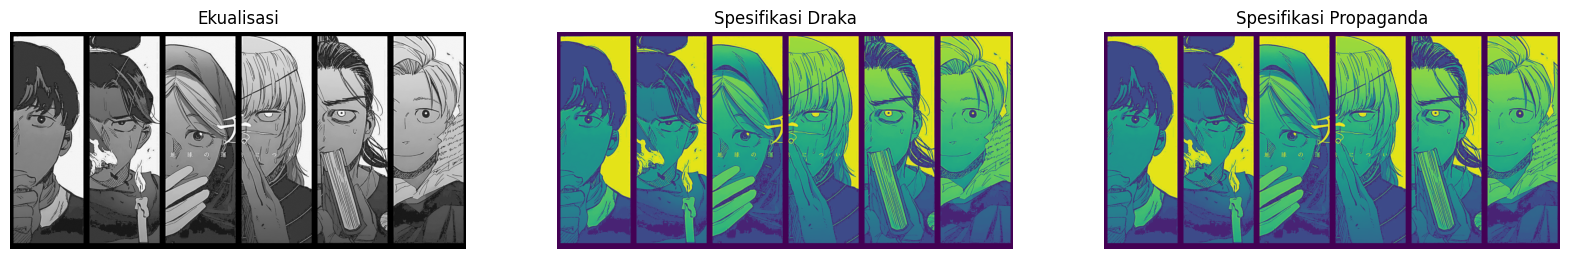

In [59]:
reference_draka = cv2.imread('Assets/draka.jpg', cv2.IMREAD_GRAYSCALE)
reference_propaganda = cv2.imread('Assets/propaganda.jpg', cv2.IMREAD_GRAYSCALE)

draka_img = spesifikasi_draka(diekualisasi_1, reference_draka)
propaganda_img = spesifikasi_propaganda(diekualisasi_1, reference_propaganda)

plt.figure(figsize=(20, 8))

plt.subplot(1, 3, 1)
plt.title("Ekualisasi")
plt.imshow(diekualisasi_1, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Spesifikasi Draka")
plt.imshow(draka_img)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title("Spesifikasi Propaganda")
plt.imshow(propaganda_img)
plt.axis('off')
